In [163]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [93]:
credit_data = pd.read_csv('credit_risk_dataset.csv')  #Read data %%file

In [94]:
df = credit_data.copy()  #Copy dataset 

In [5]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [19]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [38]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [15]:
df.shape

(32581, 12)

In [8]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [20]:
#Check the mode and median for person_emp_length and loan_int_rate variables
print('person_emp_length mode {} '.format(df['person_emp_length'].mode()[0]))
print('person_emp_length median {}'.format(df['person_emp_length'].median()))
print('loan_int_rate mode {} '.format(df['loan_int_rate'].mode()[0]))
print('loan_int_rate median {}'.format(df['loan_int_rate'].median()))

person_emp_length mode 0.0 
person_emp_length median 4.0
loan_int_rate mode 7.51 
loan_int_rate median 10.99


**Evaluation**

person_emp_length is employment length in years. So, changing NA values to mode would be more suitable. 

loan_int-rate is interest rate. So, changing NA values to median value would be more suitable. 

In [24]:
# Fill NA values to mode and median
df['person_emp_length'].fillna(df['person_emp_length'].mode()[0],inplace = True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(),inplace = True)

In [25]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [51]:
# Find numerical variebles, then print the numerical variebles
num_cols = pd.DataFrame(df[df.select_dtypes(include=['float64', 'int64']).columns])
num_cols.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [62]:
# drop the label column 'loan status' before visualization, because loan status values are 0(non default) and 1 (default)
num_cols_hist = num_cols.drop(['loan_status'], axis=1)

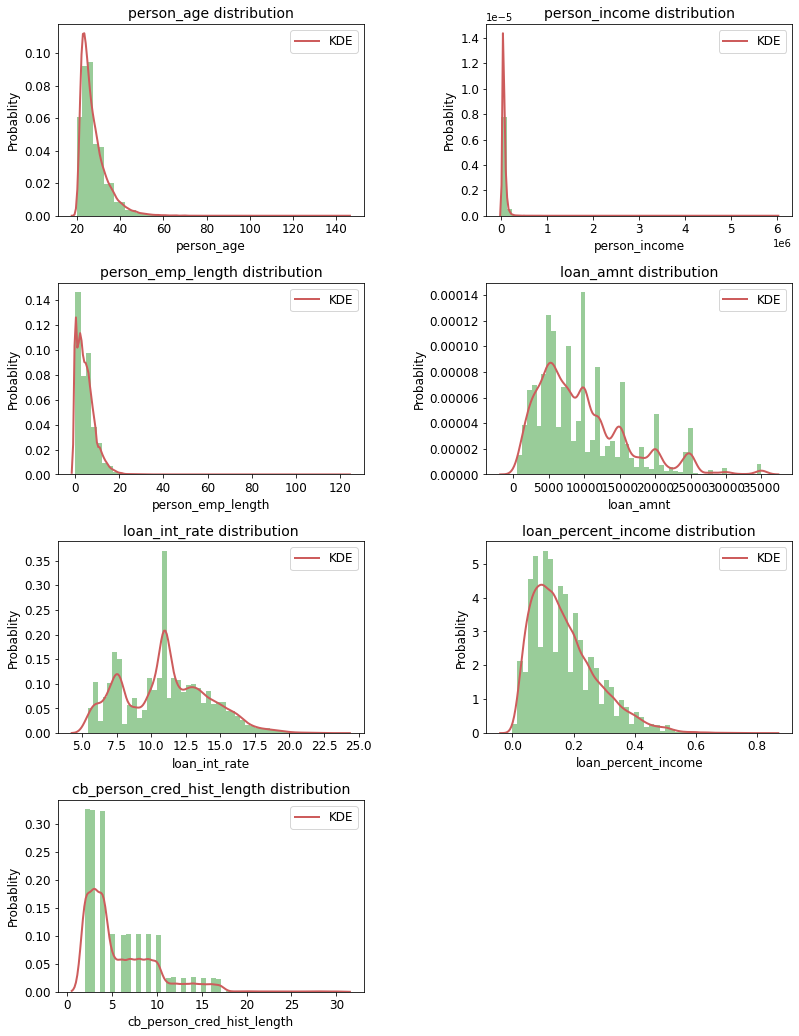

In [123]:
from warnings import filterwarnings
filterwarnings('ignore')

plt.figure(figsize=(12,16))

for i, col in enumerate(num_cols_hist.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(num_cols_hist[col], color='Green', 
                 kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.40)
plt.show()

In [80]:
#Describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,32581.0,4.658114,4.159669,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,32581.0,11.009620,3.081611,5.42,8.49,10.99,13.11,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


**Evaluation**

-->According to graphs and describing table; 

  -person_age is generally between 20-60, and people who are above 100 look like outlier, therefore, these values will be dropped.
  
  -person_income: its median is 55000, and people who have above 4million income might be outlier, therefore, these values will be dropped.
  
  -person_emp_length is generally between 0-20, and people who have above 40 years might be outlier, therefore, these values will ve dropped. 
  
  -Other variables look fine, therefore, I will keep other variables.
 

In [125]:
#Rearrange the dataset, and drop outliers

cleaned_df = df[df['person_age'] <= 100]
cleaned_df = df[df['person_income'] <= 4000000]
cleaned_df = df[df['person_emp_length'] <= 40]


In [83]:
#Get numerical variables
cleaned_df_cols = pd.DataFrame(cleaned_df[cleaned_df.select_dtypes(include = ['float64', 'int64']).columns])

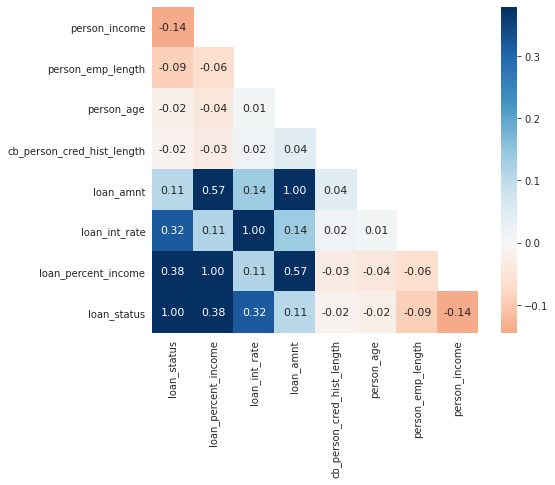

In [107]:
#Check the correlations among the variables

corr_df = cleaned_df_cols.corr().sort_values('loan_status', axis = 1, ascending = False)
corr_df = corr_df.sort_values('loan_status', axis = 0, ascending = True)
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (8, 6))
    ax = sns.heatmap(corr_df, mask = mask, vmin = corr_df.loan_status.min(), vmax = corr_df.drop(['loan_status'], axis=0).loan_status.max(),
                    square=True, annot = True, fmt='.2f', center=0, cmap='RdBu', annot_kws={"size": 11})


**Evaluation**

-person_emp_length, person_income and person_age have negative relationship with loan status which is default. It means that while these variables become larger, the risk would be less. 

-loan_amnt, loan_int_rate and loan_percent_income have positive relationship with loan status whihc is default. It means that while these variables become larger, also the risk of person would be higher. 

In [109]:
#Get the categorical variables
categ_df_cols = pd.DataFrame(cleaned_df[cleaned_df.select_dtypes(include=['object']).columns])
categ_df_cols.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

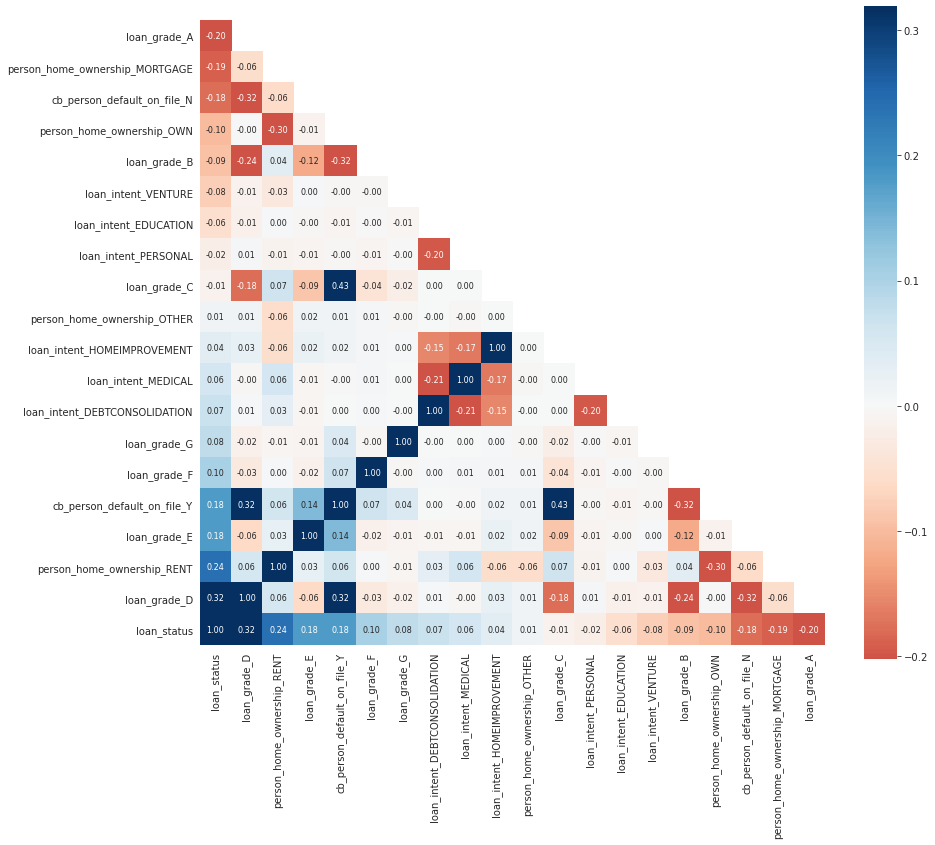

In [121]:
#One-hot encode the categorical varaibles, then check the correlation among the variables

encoded_categ_df_cols = pd.get_dummies(categ_df_cols)
categ_df_cols_corr = pd.concat([encoded_categ_df_cols, cleaned_df['loan_status']], axis=1)
corr = categ_df_cols_corr.corr().sort_values('loan_status', axis = 1, ascending = False)
corr = corr.sort_values('loan_status', axis = 0, ascending = True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize= (14,12))
    ax = sns.heatmap(corr, mask = mask, vmin = corr.loan_status.min(), vmax = corr.drop(['loan_status'], axis=0).loan_status.max(),
                    square = True, annot = True, fmt='.2f', center=0, cmap='RdBu', annot_kws={"size":8})



**Evalualation**

-We can see the variables that have negative and positive relationship with loan_status above. 

In [135]:
#Concat the numerical and encoded categorical variables

cleaned_df = pd.concat([cleaned_df_cols,encoded_categ_df_cols],axis=1)
cleaned_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


In [141]:
#Check the cleaned dataset size
print(cleaned_df.shape[0], cleaned_df.shape[1])

32578 27


**Multilinear Regression**

In [154]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [156]:
x = cleaned_df.drop('loan_status', axis=1)
y = cleaned_df['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [157]:
training = cleaned_df.copy()

In [160]:
#Statsmodels

lm = sm.OLS(y_train, x_train)

In [161]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_status   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     638.8
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:18:10   Log-Likelihood:                -8318.1
No. Observations:               26062   AIC:                         1.668e+04
Df Residuals:                   26039   BIC:                         1.687e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
person_age                        -0.0011      0.001     -1.785      0.074      -0.002       0.000
person_income                   3.103e-07   3.88e-08      8.002      0.000    2.34e-07    3.86e-07
person_emp_length                 -0.0005      0.001     -0.961      0.337      -0.002       0.001
loan_amnt                      -1.399e-05   4.79e-07    -29.189      0.000   -1.49e-05   -1.31e-05
loan_int_rate                      0.0060      0.002      3.761      0.000       0.003       0.009
loan_percent_income                1.7803      0.028     63.795      0.000       1.726       1.835
cb_person_cred_hist_length         0.0010      0.001      0.985      0.324      -0.001       0.003
person_home_ownership_MORTGAGE     0.0393      0.010      3.871      0.000       0.019       0.059
person_home_ownership_OTHER        0.1116      0.031      3.613      0.000       0.051       0.172
person_home_ownership_OWN         -0.0864      0.011     -7.555      0.000      -0.109      -0.064
person_home_ownership_RENT         0.1288      0.010     12.734      0.000       0.109       0.149
loan_intent_DEBTCONSOLIDATION      0.0803      0.007     12.190      0.000       0.067       0.093
loan_intent_EDUCATION             -0.0161      0.006     -2.587      0.010      -0.028      -0.004
loan_intent_HOMEIMPROVEMENT        0.0824      0.007     11.285      0.000       0.068       0.097
loan_intent_MEDICAL                0.0637      0.006      9.925      0.000       0.051       0.076
loan_intent_PERSONAL               0.0134      0.007      2.043      0.041       0.001       0.026
loan_intent_VENTURE               -0.0306      0.006     -4.746      0.000      -0.043      -0.018
loan_grade_A                      -0.2808      0.011    -25.384      0.000      -0.302      -0.259
loan_grade_B                      -0.2671      0.008    -31.805      0.000      -0.284      -0.251
loan_grade_C                      -0.2410      0.008    -29.343      0.000      -0.257      -0.225
loan_grade_D                       0.1105      0.010     11.312      0.000       0.091       0.130
loan_grade_E                       0.1627      0.014     11.470      0.000       0.135       0.191
loan_grade_F                       0.2091      0.023      9.027      0.000       0.164       0.254
loan_grade_G                       0.4998      0.042     12.013      0.000       0.418       0.581
cb_person_default_on_file_N        0.0954      0.014      6.721      0.000       0.068       0.123
cb_person_default_on_file_Y        0.0978      0.014      6.820      0.000       0.070       0.126
==============================================================================
Omnibus:                     3102.838   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [164]:
#Scikit-learn model

lm = LinearRegression()
model = lm.fit(x_train, y_train)

In [165]:
model.intercept_

0.20470417837305327

In [166]:
model.coef_

array([-1.14642870e-03,  3.10333475e-07, -5.15820507e-04, -1.39903194e-05,
        5.97485861e-03,  1.78034088e+00,  9.80882518e-04, -9.00332383e-03,
        6.32615657e-02, -1.34709235e-01,  8.04509926e-02,  4.81222010e-02,
       -4.83062339e-02,  5.02362514e-02,  3.15358820e-02, -1.88151308e-02,
       -6.27729697e-02, -3.08390694e-01, -2.94653207e-01, -2.68626379e-01,
        8.28539023e-02,  1.35096415e-01,  1.81476735e-01,  4.72243228e-01,
       -1.21751119e-03,  1.21751119e-03])

In [168]:
from sklearn.metrics import mean_squared_error

In [170]:
#Finding training error
rmse = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
rmse

0.33294651757418076

In [172]:
#Test Error

rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
rmse

0.3300010928062411

**Model Tuning**

In [173]:
cross_val_score(model, x, y, cv = 10, scoring="r2").mean()

0.32241870329304817

In [175]:
#Training Error
np.sqrt(-cross_val_score(model, x_train, y_train, cv = 10, scoring="neg_mean_squared_error").mean())

0.33369414057050306

In [176]:
#Test Error
np.sqrt(-cross_val_score(model, x_test, y_test, cv = 10, scoring="neg_mean_squared_error").mean())

0.33064513808465623